# Playing with Entropy:  $S = - \sum p_i \log p_i$

Entropy is the expected value of the number of bits to represent a distribution.

Rare events make the absolute value of log p very large.  That is, to represent $ p = 0.000000001$, we have to write

In [3]:
np.log2(0.000000001)

-29.897352853986263

In [4]:
np.log2(0.5)

-1.0

that is, 

$$
\log_2 0.000000001 = -29.9,
$$

but for common events, such as $ p = .5$, we get

$$
\log_2 .5 = -1.0.
$$

Therefore, the rare event ( $ p = 0.000000001$) contributes much large to the $\log$ term of the $ p log p$ expression.

However, as the $\log$ term grows, the probability becomes smaller and smaller.  

**That is, the $p$ term is reducing the value of $p \log p$ while the $\log$ term is increasing it.**

So, these two values are in tension.  Who wins?  Let's plot them.

In [5]:
x = np.arange(0, 1, .001)

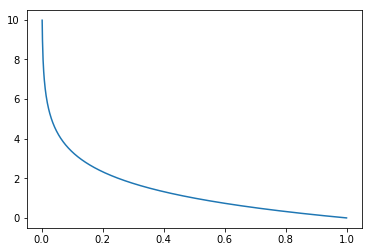

In [6]:
p = x
plt.plot(p, - np.log2(p));

So, notice, again, from the plot above that small values of $p$ give large values of $- \log p$

Now, let's plot $- p \log p$ and see where it is maximized:

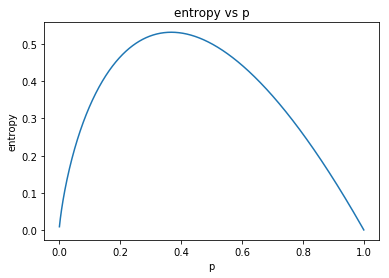

In [7]:
plt.plot(p, - p * np.log2(p));
plt.title('entropy vs p');
plt.ylabel('entropy')
plt.xlabel('p');

## We see that $- p \log p$ is maximum at .53 around $p = .35$.


In [8]:
np.nanmax(- p * np.log2(p))

0.53073781692666733

In [9]:
# get the index of the max value
def nanargmax(a):
    idx = np.argmax(a, axis=None)
    multi_idx = np.unravel_index(idx, a.shape)
    if np.isnan(a[multi_idx]):
        nan_count = np.sum(np.isnan(a))
        # In numpy < 1.8 use idx = np.argsort(a, axis=None)[-nan_count-1]
        idx = np.argpartition(a, -nan_count-1, axis=None)[-nan_count-1]
        multi_idx = np.unravel_index(idx, a.shape)
    return multi_idx

nanargmax(- p * np.log2(p))

(368,)

In [10]:
# find the p value at the max entropy
p[7]

0.0070000000000000001

In [11]:
(- p * np.log2(p))[7]

0.050109005538231381

In [12]:
- p * np.log2(p)

array([        nan,  0.00996578,  0.01793157,  0.02514247,  0.03186314,
        0.03821928,  0.04428493,  0.05010901,  0.05572627,  0.06116273,
        0.06643856,  0.07156988,  0.07656986,  0.08144948,  0.08621801,
        0.09088341,  0.09545255,  0.09993146,  0.10432547,  0.10863928,
        0.11287712,  0.1170428 ,  0.12113976,  0.12517111,  0.12913972,
        0.1330482 ,  0.13689896,  0.14069421,  0.14443602,  0.1481263 ,
        0.15176681,  0.15535923,  0.1589051 ,  0.16240588,  0.16586293,
        0.16927754,  0.17265093,  0.17598424,  0.17927856,  0.1825349 ,
        0.18575425,  0.18893752,  0.19208561,  0.19519934,  0.19827952,
        0.2013269 ,  0.20434223,  0.20732619,  0.21027945,  0.21320265,
        0.2160964 ,  0.21896131,  0.22179792,  0.22460678,  0.22738843,
        0.23014335,  0.23287204,  0.23557497,  0.23825259,  0.24090533,
        0.24353362,  0.24613786,  0.24871845,  0.25127577,  0.25381019,
        0.25632207,  0.25881175,  0.26127957,  0.26372586,  0.26

In [13]:
from scipy.stats import norm

## find entropy values of normal distribution

-27.125869666633911

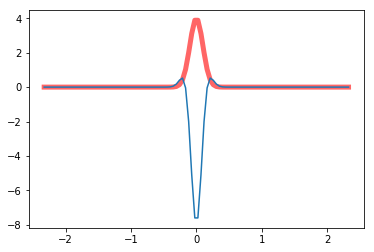

In [14]:
mean, var, skew, kurt = norm.stats(moments='mvsk')
fig, ax = plt.subplots(1, 1)

x = np.linspace(norm.ppf(0.01), 
                norm.ppf(0.99), 100)

norm_vals = norm.pdf(x, scale = .1)

# find entropy as dot product
p = norm_vals
entropy = - np.dot(p, np.log2(p))

ax.plot(x, norm_vals,
        'r-', lw=5, alpha=0.6, label='norm pdf');

ax.plot(x, - norm_vals * np.log2(norm_vals));

entropy

In [15]:
# find the entropy

entropy = 0
for xval in x:
    p = norm.pdf(xval, scale = .5)
    #print(xval,p)
    entropy -= p * np.log2(p)
    
print(entropy)

22.2791149094


In [16]:
- np.log2(.1)

3.3219280948873622

In [17]:
- np.log2(.01)

6.6438561897747244

In [18]:
- np.log2(.00000001)

26.575424759098897

In [19]:
- np.log2(.9)

0.15200309344504997

In [20]:
- np.log2(.999999999)

1.4426950008081088e-09

In [21]:
- np.log2(.99999999) * .99999999

1.4426950409246834e-08

In [22]:
- np.log2(.1) * .1

0.33219280948873625

In [23]:
- np.log2(.5) * .5

0.5

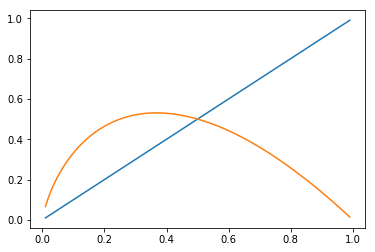

In [24]:
#entropy values of p values between 0 and 1

fig, ax = plt.subplots(1, 1)

x = np.linspace(0.01, 0.99, 100)


ax.plot(x, x);

ax.plot(x, - x * np.log2(x));

In [25]:
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
scale = np.linspace(0.01, 0.99, 100)

entropies = []
scales = []
for scale_i in scale:
    try:
        norm_vals = norm.pdf(x, scale = scale_i)
    
        # find entropy as dot product
        p = norm_vals
        entropy = - np.dot(p, np.log2(p))
        entropies.append(entropy)
        scales.append(scale_i)
    except:
        break

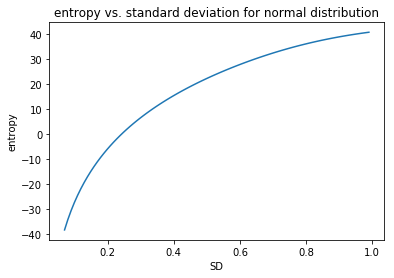

In [26]:
plt.plot(scales, entropies)
plt.title("entropy vs. standard deviation for normal distribution");
plt.xlabel("SD");
plt.ylabel("entropy");

## Coin-flipping

## 0 = tails, 1 = heads

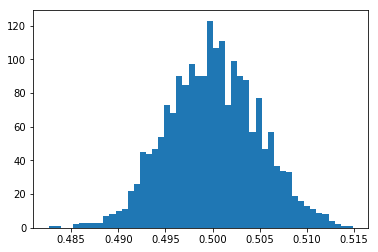

In [27]:
import random as rnd
num_flips = 10000
possible_states = 2

num_batches = 2000

heads_probs = []

for i in range(num_batches):
    flippings = rnd.choices(population=list(range(possible_states)), k = num_flips)
    states = set(flippings)

    probs = {}

    for state in states:
        probs[state] = flippings.count(state)/len(flippings)
        
    #probs


    vals = np.array(list(probs.values()))
    #vals

    entropy = - np.dot(vals, np.log2(vals))

    heads_probs.append(probs[0])
    
    #print("microstates: " + str(flippings))
    #print("macrostates: " + str(probs))
    #print("entropy: " + str(entropy))
    
my_hist = plt.hist(heads_probs, bins=50)

## more Entropy

Entropy is the measure of order of a system.

In information theory, entropy describes how much information is in the system.

$$
S = - \sum p(i) \log_2 p(i)
$$
 
What does this really mean?

> Remember, the definition of *mean* is:

> $ \mu = \sum x p(x) $, 

> which is just each value of $x$ multiplied by the probability $p(x)$.


If we look at the formula above, we see that if we ignore the negative sign, the sum is just the average of the $\log p(i)$.

But what is the $\log p(i)$ ? 

In base 2 ("binary"), the $\log$ just tells us **how many bits are needed to write a number**.

That is the above summation is a weighted average of the number of bits needed to represent each probability.


$\log 2 = 1$, and sure enough, in binary we write $2$ as $"10"$

$\log 4 = 2 \to 4 = "100"$ 

$\log 8 = 3 \to 8 = "1000"$

Try it below:

In [28]:
x = 2
np.log2(x)

1.0

We can also plot all of these, for example for powers of $2$ up to $2^8$

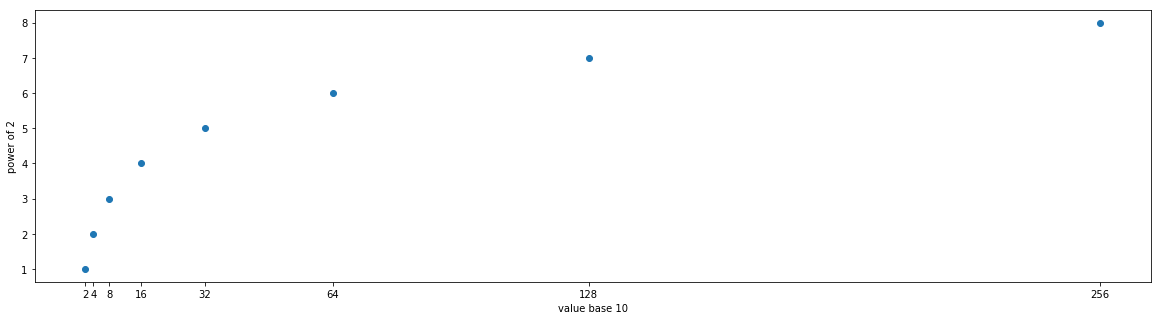

In [29]:
base = 2
max_power = 8
x = np.power(base,np.linspace(1,max_power, max_power))
plt.figure(figsize=[20, 5])
plt.scatter(x, np.log2(x));
plt.xticks(x);
plt.xlabel("value base 10")
plt.ylabel("power of " + str(base));

since for probabilities, $0 < p \le 1$, the $\log_2 p$ will always be negative.

This is because a decimal value is a negative power of 2.  

E.g. 

$2^{-1} = \frac12 = .5$, 

$2^{-2} = \frac14 = .25$ 

Try it:

In [30]:
p = 0.25
np.log2(p)

-2.0

but we would like entropy to be positive, so we negate it.

the resulting formula is just the average number of bits needed to describe a distribution, again:

$$ 
S = - \sum p(i) \log_2 p(i)
$$

Intuitively, if a $p(i)$ value is very small, it is rare, so it's occurence has a high information content.  

So, if many rare events occur in a distribution, the average information increases. 

If, on the other hand, only a few very likely events occur, the average information is low.  The system only has a few possible states and is easy to describe.

Try it here by adjusting the width of the normal distribution with the standard deviation:

Total entropy S = 40.9211327358


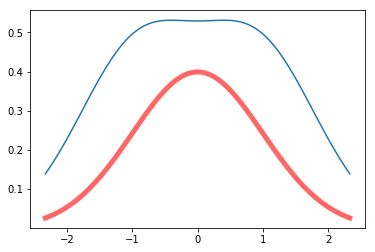

In [31]:
standard_deviation = 1

x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)

norm_vals = norm.pdf(x, scale = standard_deviation)

# find entropy as dot product
p = norm_vals
entropy = - (p * np.log2(p))

plt.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')

plt.plot(x, entropy);

print("Total entropy S = " + str(np.sum(entropy)))

In [32]:
# why is this different?
import scipy.stats
scipy.stats.entropy(p, base=2)

6.343909002423473